In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# !pip install pandas -U

In [16]:
MCACapacity = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/starter-kits/Kenya/Results/MCACapacity.csv")
MCACapacity

,technology,dst_region,region,agent,sector,type,year,capacity
0,Biomass Power Plant,Kenya,Kenya,A1,power,retrofit,2020,2.7864
1,Geothermal Power Plant,Kenya,Kenya,A1,power,retrofit,2020,12.9722
2,Large Hydropower Plant (Dam) (>100MW),Kenya,Kenya,A1,power,retrofit,2020,15.4490
3,Light Fuel Oil Power Plant,Kenya,Kenya,A1,power,retrofit,2020,8.9010
4,Medium Hydropower Plant (10-100MW),Kenya,Kenya,A1,power,retrofit,2020,7.7028
...,...,...,...,...,...,...,...,...
254,Crude Oil Refinery Option 2,Kenya,Kenya,A1,oil,retrofit,2050,32.0436
255,Crude Oil Refinery Option 2,Kenya,Kenya,A1,oil,retrofit,2050,485.2984
256,Crude Oil Refinery Option 1,Kenya,Kenya,A2,oil,retrofit,2050,18260.4934
257,Crude Oil Refinery Option 2,Kenya,Kenya,A2,oil,retrofit,2050,32.0436


In [17]:
MCACapacity_summed = MCACapacity.groupby(["technology", "sector", "year"]).sum().reset_index()
MCACapacity_summed

,technology,sector,year,capacity
0,Biomass Power Plant,power,2020,5.5728
1,Biomass Power Plant,power,2025,5.0156
2,Biomass Power Plant,power,2030,89.0089
3,Biomass Power Plant,power,2035,88.5575
4,Biomass Power Plant,power,2040,88.1513
...,...,...,...,...
114,Solar PV (Utility),power,2030,333.3990
115,Solar PV (Utility),power,2035,333.2786
116,Solar PV (Utility),power,2040,333.1702
117,Solar PV (Utility),power,2045,333.0728


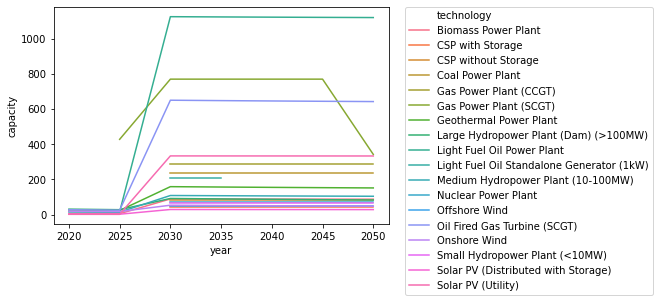

In [18]:
sns.lineplot(data=MCACapacity_summed[(MCACapacity_summed.sector=="power")], x="year", y="capacity", hue="technology")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

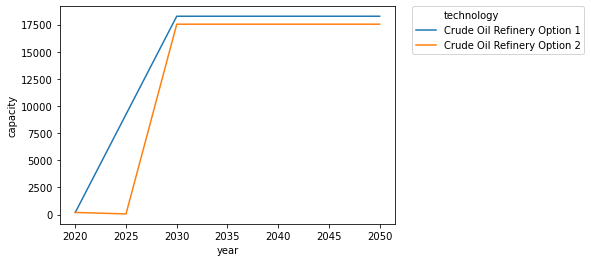

In [19]:
sns.lineplot(data=MCACapacity_summed[MCACapacity_summed.sector=="oil"], x="year", y="capacity", hue="technology")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [20]:
prices = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/starter-kits/Kenya/Results/MCAPrices.csv")
prices_summed = prices.groupby(["commodity","year"]).sum("prices").reset_index()
prices_summed

,commodity,year,prices
0,biomass,2020,10.5600
1,biomass,2025,10.5600
2,biomass,2030,10.5600
3,biomass,2035,10.5600
4,biomass,2040,10.5600
5,biomass,2045,10.5600
6,biomass,2050,10.5600
7,coal,2020,30.6000
8,coal,2025,31.8000
9,coal,2030,33.0000


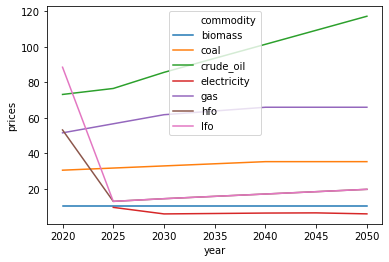

In [21]:
sns.lineplot(data=prices_summed, x="year", y="prices", hue="commodity")